In [23]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import time
%matplotlib inline





We define a function of contagion

In [24]:
def propagate_simple(G,p):
    to_infect = set([])
    # Find infected nodes
    for v in G.nodes():
        if G.nodes[v]['infected'] == 'I':
            #infect all
            for w in nx.neighbors(G, v):
                if G.nodes[w]['infected'] == 'S':
                    if random.random() < p:
                        to_infect.add(w)
                        break
    # Infect marked nodes
    for v in to_infect:
        G.nodes[v]['infected'] = 'I'

We need a recovering function (I->R)

In [25]:
def recover(G,beta):
    to_recover = set([])
    # Find infected nodes
    for v in G.nodes():
        if G.nodes[v]['infected'] == 'I':
            if random.random() < beta:
                G.nodes[v]['infected'] = 'R'

In [26]:
def update(G, p, q):
    propagate_simple(G,p)
    recover(G,q)
    

In [27]:
def plot_graph(G):
    node_color = ['#bfbf7f' if G.nodes[v]['infected'] =='I' else '#9f9fff'for v in G.nodes]
    
    nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=node_color)



Loading a graph and setting all healthy

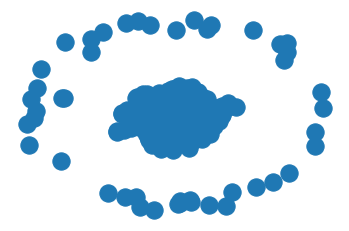

In [28]:
#G = nx.generators.classic.cycle_graph(1000)
#G = nx.generators.classic.complete_graph(1000)
G = nx.generators.random_graphs.fast_gnp_random_graph(1000,0.003)

nx.set_node_attributes(G,'S', 'infected')
plt.plot()
nx.draw(G)
plt.show()

setting initial contagion

In [29]:
initial_index = random.randint(0, len(G) - 1)
G.nodes[random.choice(list(G.nodes))]['infected'] = 'I'


In [30]:
#prob of contagion in contact
p = 0.2
#prob of recover
beta = 1 / 10


Plots

In [31]:
t = 100 #iterations to simulate
Susceptibles = t * [None]
Infectius = t * [None]
Recovered = t * [None]
for i in range(t):
    dict_atributes=nx.get_node_attributes(G, 'infected')
    Susceptibles[i] = sum(x == 'S' for x in dict_atributes.values()) 
    Infectius[i] = sum(x == 'I' for x in dict_atributes.values()) 
    Recovered[i] = sum(x == 'R' for x in dict_atributes.values()) 
    
    #plot_graph(G)
    #plt.show()
    #time.sleep(1)
    update(G, p, beta)
    
    

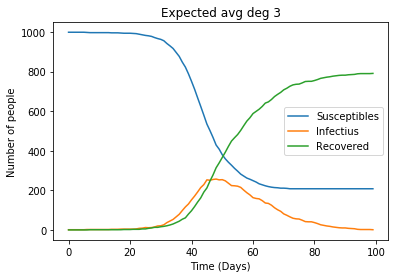

In [32]:
plt.plot(Susceptibles, label='Susceptibles')
plt.plot(Infectius, label='Infectius')
plt.plot(Recovered, label='Recovered')
plt.legend(loc='best')
plt.xlabel("Time (Days)")
plt.ylabel("Number of people")
plt.title("Expected avg deg 3")
plt.savefig("deg2")
